In [1]:
# if nltk was not installed - execute the below command 
# pip install -U nltk 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:0031m12.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 kB 30.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import nltk
import numpy as np

# Import Dataset

In [2]:
init_path = "../../data/"
train_data = pd.read_csv(init_path + "train_data.csv")
test_data = pd.read_csv(init_path + "test_data.csv")
val_data = pd.read_csv(init_path + "val_data.csv")

In [3]:
def extract_data(data):
    X = data["Source"]
    y = data["Label"]
    return np.asarray(X), np.asarray(y)

In [4]:
X_train, y_train = extract_data(train_data)
X_test, y_test = extract_data(test_data)
X_val, y_val = extract_data(val_data)

In [5]:
from collections import Counter 

print("Train labels ratio: ")
print(Counter(y_train.tolist()))

print("Test labels ratio: ")
print(Counter(y_test.tolist()))

print("Val labels ratio: ")
print(Counter(y_val.tolist()))

Train labels ratio: 
Counter({3: 10961, 2: 4779, 1: 296})
Test labels ratio: 
Counter({3: 2378, 2: 1006, 1: 76})
Val labels ratio: 
Counter({3: 2366, 2: 1025, 1: 68})


# Training model for calcualting probabilities

In [6]:
nltk.download('punkt') # Punkt is a pretrained tokenizer model 

[nltk_data] Downloading package punkt to
[nltk_data]     /home/mallasailesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk import word_tokenize, sent_tokenize

N = 5 # parameter
tokenized_data, num_ngrams = [], []

for text in X_train: 
    tokenized_text = [word_tokenize(sent.lower()) for sent in sent_tokenize(text)]
    tokenized_data += tokenized_text # similar to extend function 
    num_ngrams.append(sum([len(sent)-N+1 for sent in tokenized_text]))
    
num_ngrams = sorted(num_ngrams)

cumulative_distribution_ngrams = {}
for i in range(5, 101, 5):
    cumulative_distribution_ngrams[i] =  num_ngrams[(i*len(num_ngrams))//100 - 1]
print("Cumulative Distribution of n-grams per data point (by %)")
print(cumulative_distribution_ngrams)

Cumulative Distribution of n-grams per data point (by %)
{5: 16, 10: 19, 15: 20, 20: 22, 25: 23, 30: 24, 35: 25, 40: 27, 45: 28, 50: 29, 55: 31, 60: 32, 65: 33, 70: 34, 75: 35, 80: 37, 85: 38, 90: 40, 95: 43, 100: 69746}


In [35]:
tokenized_data

[['...',
  'men',
  'and',
  'women',
  'struggling',
  'with',
  'addictions',
  'find',
  'healing',
  ',',
  'forgiveness',
  'and',
  'the',
  'chance',
  'to',
  'make',
  'a',
  'new',
  'start',
  'in',
  'life',
  '.'],
 ['..',
  'families',
  'living',
  'from',
  'paycheck',
  'to',
  'paycheck',
  'find',
  'comfort',
  ',',
  'food',
  'and',
  'emergency',
  'assistance',
  '.'],
 ['politics',
  'has',
  'never',
  'made',
  'stranger',
  'bedfellows',
  'than',
  'in',
  'george',
  'will',
  "'s",
  'wp',
  'column',
  'in',
  'which',
  'on',
  'libertarian',
  'grounds',
  ',',
  'he',
  'defends',
  'the',
  'right',
  'of',
  'african-american',
  'hair',
  'care',
  'practitioners',
  'to',
  'administer',
  'unlicensed',
  '``',
  'sisterlocks',
  '.',
  "''"],
 ['people',
  'like',
  'four-year-old',
  'levi',
  ',',
  'who',
  'was',
  'born',
  'with',
  'spina',
  'bifida',
  'and',
  'unable',
  'to',
  'walk',
  'or',
  'talk',
  'until',
  'he',
  'received'

In [36]:
from nltk.lm.preprocessing import padded_everygram_pipeline

train_data, padded_sents = padded_everygram_pipeline(N, [["a", "b", "e"], ["c", "d", "f", "g"]])
for generator in train_data:
#     print(list(generator))
    print(list(generator)[2:-1:3])

[('<s>', '<s>', '<s>'), ('<s>',), ('<s>', '<s>', '<s>', 'a'), ('<s>', '<s>'), ('<s>', '<s>', 'a', 'b', 'e'), ('<s>', 'a', 'b'), ('a',), ('a', 'b', 'e', '</s>'), ('b', 'e'), ('b', 'e', '</s>', '</s>', '</s>'), ('e', '</s>', '</s>'), ('</s>',), ('</s>', '</s>', '</s>', '</s>'), ('</s>', '</s>', '</s>')]
[('<s>', '<s>', '<s>'), ('<s>',), ('<s>', '<s>', '<s>', 'c'), ('<s>', '<s>'), ('<s>', '<s>', 'c', 'd', 'f'), ('<s>', 'c', 'd'), ('c',), ('c', 'd', 'f', 'g'), ('d', 'f'), ('d', 'f', 'g', '</s>', '</s>'), ('f', 'g', '</s>'), ('g',), ('g', '</s>', '</s>', '</s>'), ('</s>', '</s>'), ('</s>',), ('</s>',)]


In [37]:
for sent in padded_sents:
    print(sent)

<s>
<s>
<s>
<s>
a
b
e
</s>
</s>
</s>
</s>
<s>
<s>
<s>
<s>
c
d
f
g
</s>
</s>
</s>
</s>


In [38]:
from nltk.lm import MLE

train_data, padded_sents = padded_everygram_pipeline(N, tokenized_data)
model = MLE(N) # Maximum likelihood estimation 
model.fit(train_data, padded_sents)

# Feature Extraction

In [39]:
from nltk.util import ngrams

def compute_good_and_bad_thresholds(good_ratio=0.4, bad_ratio=0.2):
    global model, X_train
    _d = {}
    for x in X_train:
        sents = sent_tokenize(x)
        for sent in sents:
            words = word_tokenize(sent.lower())
            curr_ngrams = list(ngrams(words, n=N, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>"))
            for ngram in curr_ngrams:
                _d[tuple(ngram)] = model.score(ngram[-1], ngram[:-1])
    probabilities = sorted(_d.values())
    ValForGood = probabilities[int((1 - good_ratio)*len(probabilities))]
    ValForBad = probabilities[int(bad_ratio*len(probabilities))]
    return ValForGood, ValForBad

In [40]:
ValForGood, ValForBad = compute_good_and_bad_thresholds(good_ratio=0.7, bad_ratio=0.05)
print(ValForGood, ValForBad)

1.0 0.16483516483516483


In [41]:
EPSILON = 1e-9
INF = 1e9

def get_all_ngram_probabilities_and_avg_perplexity_scores(X):
    
    global model, INF, N # This means the model will use those variable which were defined outside of it 
    X = X.lower()
    sentences = sent_tokenize(X)
    
    if len(sentences) == 0:
        return [], INF
    
    all_ngram_probabilities, all_perplexities = [], []
    for sent in sentences:
        words = word_tokenize(sent)
        curr_ngrams = list(ngrams(words, n=N, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>"))
        all_ngram_probabilities.append([max(EPSILON, model.score(ngram[-1], ngram[:-1])) for ngram in curr_ngrams]) # used to handle zero probability issues 
        perplexity = model.perplexity(curr_ngrams)
        if perplexity == 'inf':
            perplexity = INF
        all_perplexities.append(perplexity)
        
    return all_ngram_probabilities, sum(all_perplexities) / len(all_perplexities)

In [51]:
K = 16 # K frequent and K rarest n-gram probabilities of a sentence are considered as features

def get_feature_vector(X):
    
    global K
    all_ngram_probabilities, avg_perplexity = get_all_ngram_probabilities_and_avg_perplexity_scores(X) 
    
    if len(all_ngram_probabilities) == 0:
        return [0 for _ in range(2*K)] + [INF]
    
    all_ngram_probabilities = sorted(sum(all_ngram_probabilities, [])) # flattens the list of lists into one list and then sort the probabilities in ascending order 
    
    frequent_k, rarest_k = all_ngram_probabilities[-K:], all_ngram_probabilities[:K]
    if len(frequent_k) < K:
        median = frequent_k[len(frequent_k) // 2]
        for _ in range(K - len(frequent_k)):
            frequent_k.append(median)
        frequent_k = sorted(frequent_k)
    if len(rarest_k) < K:
        median = rarest_k[len(rarest_k) // 2]
        for _ in range(K - len(rarest_k)):
            rarest_k.append(median)
        rarest_k = sorted(rarest_k)
        
    return frequent_k + rarest_k + [avg_perplexity]

In [52]:
from math import log

def get_score(probabilities):
    if len(probabilities) == 0:
        return 0
    all_sent_scores = []
    for curr_sent_probabilities in probabilities:
        all_sent_scores.append(sum([log(p) for p in curr_sent_probabilities]) / len(curr_sent_probabilities))
    return sum(all_sent_scores) / len(all_sent_scores)


def get_improved_score(probabilities):
    global ValForGood, ValForBad
    if len(probabilities) == 0:
        return 0
    all_sent_scores = []
    for curr_sent_probabilities in probabilities:
        score = 1 / len(curr_sent_probabilities)
        for p in curr_sent_probabilities:
            if p >= ValForGood:
                score /= p 
            elif p <= ValForBad:
                score *= p
        all_sent_scores.append(score)
    return sum(all_sent_scores) / len(all_sent_scores)

In [53]:
# Training on train set, testing on both validation and test sets 
train_features, train_labels, test_features, test_labels = [], [], [], []
scores, improved_scores = [], []

for i in range(len(X_train)):
    train_features.append(get_feature_vector(X_train[i]))
    train_labels.append(y_train[i])
    scores.append(get_score(get_all_ngram_probabilities_and_avg_perplexity_scores(X_train[i])[0]))
    improved_scores.append(get_improved_score(get_all_ngram_probabilities_and_avg_perplexity_scores(X_train[i])[0]))

for i in range(len(X_test)):
    test_features.append(get_feature_vector(X_test[i]))
    test_labels.append(y_test[i])
    scores.append(get_score(get_all_ngram_probabilities_and_avg_perplexity_scores(X_test[i])[0]))
    improved_scores.append(get_improved_score(get_all_ngram_probabilities_and_avg_perplexity_scores(X_test[i])[0]))

for i in range(len(X_val)):
    test_features.append(get_feature_vector(X_val[i]))
    test_labels.append(y_val[i])
    scores.append(get_score(get_all_ngram_probabilities_and_avg_perplexity_scores(X_val[i])[0]))
    improved_scores.append(get_improved_score(get_all_ngram_probabilities_and_avg_perplexity_scores(X_val[i])[0]))

In [54]:
from scipy.stats import pearsonr # Pearson correlation coefficient is measure of linear correlation between two variables
# Its value ranges from -1 to 1 where -1 indicate negative linear relationship, 1 - linear relationship, 0 - no linear relationship
def find_correlation(scores, y):
    corr, _ = pearsonr(scores, y)
    return corr

print("Correlation between score and labels: ", find_correlation(scores, train_labels + test_labels))
print("Correlation between improved score and labels: ", find_correlation(improved_scores, train_labels + test_labels))

Correlation between score and labels:  0.012002467290102854
Correlation between improved score and labels:  0.00975198878696677


In [55]:
# execute the below command if the imblearn module not installed
# pip install imbalanced-learn

# Training model for fluency classification

In [56]:
# Different techniques for tackling class imbalance

from imblearn.over_sampling import RandomOverSampler, SMOTE

def balance_data(x, y, _type=0):
    if _type == 1:
        ros = RandomOverSampler(random_state=42)
        return ros.fit_resample(x, y)
    elif _type == 2:
        smote = SMOTE()
        return smote.fit_resample(x, y)
    return x, y

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import json
import os

results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

statements = {0: "Without oversampling", 1: "With random oversampling", 2: "With SMOTE"}

def get_metrics(b, ytrue, ypred, file_name):
#     print('\n\n')
    print(statements[b] + '\n')
    print(classification_report(ytrue, ypred, zero_division=1))
    ret = classification_report(ytrue, ypred, output_dict=True, zero_division=1)
    ConfusionMatrixDisplay.from_predictions(ytrue, ypred)
    plt.savefig(os.path.join(results_dir, f"{file_name}_{b}_confusion-{N}-{K}.png"), dpi=300)
    plt.show()
    print('\n\n')
    with open(os.path.join(results_dir, f"{file_name}_{b}_stats-{N}-{K}.json"), "w") as f:
        json.dump(ret, f, indent=4)


Class distribution: Counter({3: 10961, 2: 4779, 1: 296})

For training set :- 

Without oversampling

              precision    recall  f1-score   support

           1       1.00      0.00      0.00       296
           2       1.00      0.00      0.00      4779
           3       0.68      1.00      0.81     10961

    accuracy                           0.68     16036
   macro avg       0.89      0.33      0.27     16036
weighted avg       0.78      0.68      0.56     16036



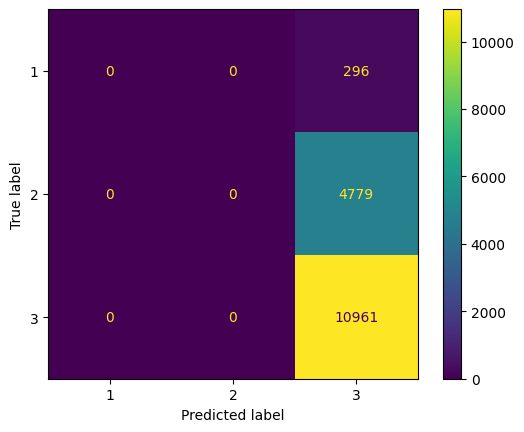





For test set :- 

Without oversampling

              precision    recall  f1-score   support

           1       1.00      0.00      0.00       144
           2       1.00      0.00      0.00      2031
           3       0.69      1.00      0.81      4744

    accuracy                           0.69      6919
   macro avg       0.90      0.33      0.27      6919
weighted avg       0.78      0.69      0.56      6919



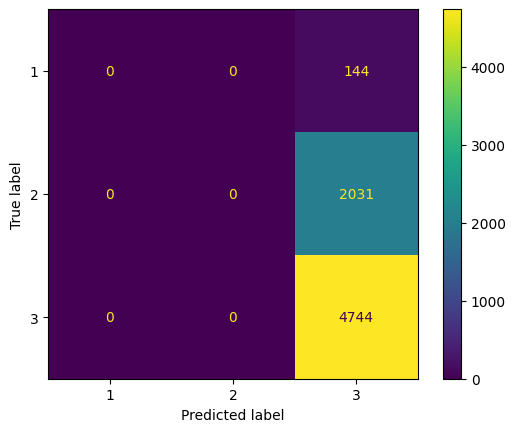




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



Class distribution: Counter({3: 10961, 2: 10961, 1: 10961})

For training set :- 

With random oversampling

              precision    recall  f1-score   support

           1       0.33      1.00      0.50     10961
           2       1.00      0.00      0.00     10961
           3       1.00      0.00      0.00     10961

    accuracy                           0.33     32883
   macro avg       0.78      0.33      0.17     32883
weighted avg       0.78      0.33      0.17     32883



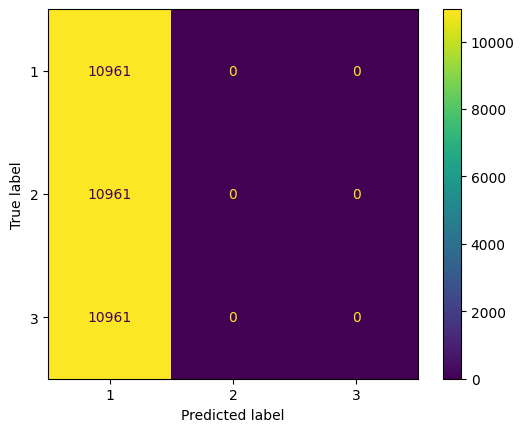





For test set :- 

With random oversampling

              precision    recall  f1-score   support

           1       0.02      1.00      0.04       144
           2       1.00      0.00      0.00      2031
           3       1.00      0.00      0.00      4744

    accuracy                           0.02      6919
   macro avg       0.67      0.33      0.01      6919
weighted avg       0.98      0.02      0.00      6919



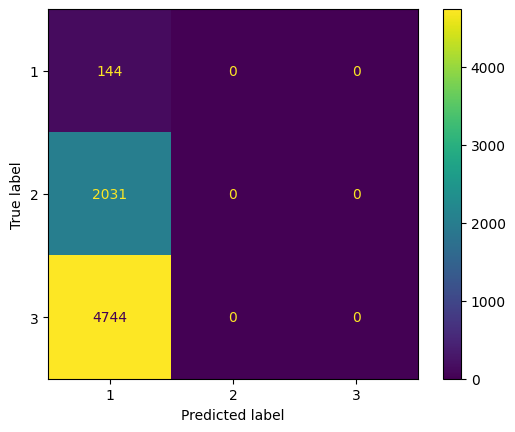




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



Class distribution: Counter({3: 10961, 2: 10961, 1: 10961})

For training set :- 

With SMOTE

              precision    recall  f1-score   support

           1       0.33      1.00      0.50     10961
           2       1.00      0.00      0.00     10961
           3       1.00      0.00      0.00     10961

    accuracy                           0.33     32883
   macro avg       0.78      0.33      0.17     32883
weighted avg       0.78      0.33      0.17     32883



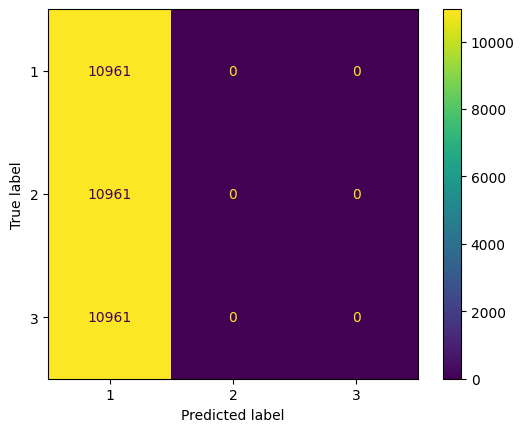





For test set :- 

With SMOTE

              precision    recall  f1-score   support

           1       0.02      1.00      0.04       144
           2       1.00      0.00      0.00      2031
           3       1.00      0.00      0.00      4744

    accuracy                           0.02      6919
   macro avg       0.67      0.33      0.01      6919
weighted avg       0.98      0.02      0.00      6919



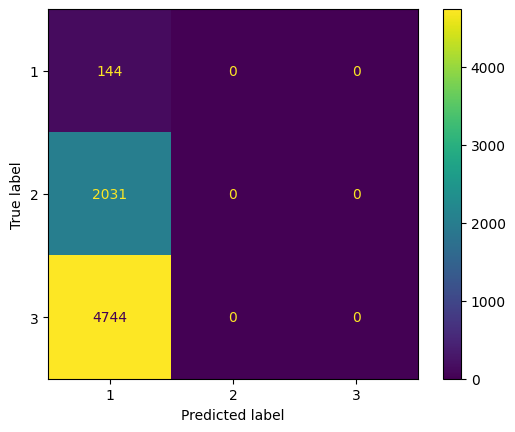




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------





In [58]:
from sklearn.linear_model import LogisticRegression

for _type in range(3):
    train_f, train_l = balance_data(train_features, train_labels, _type)
    
    # if any inf value is found it is replaced with the INF value (1e9 which we defined) to prevent issues during training and evaluation 
    for i in range(len(train_f)):
        if str(train_f[i][-1]) == 'inf':
            train_f[i][-1] = INF
    for i in range(len(test_features)):
        if str(test_features[i][-1]) == 'inf':
            test_features[i][-1] = INF

    print("Class distribution:", Counter(train_l))
    lr_model = LogisticRegression().fit(train_f, train_l)
    
    print("\nFor training set :- \n")
    train_pred = lr_model.predict(train_f)
    get_metrics(_type, train_l, train_pred, "Baseline")
    
    print("\nFor test set :- \n")
    test_pred = lr_model.predict(test_features)
    get_metrics(_type, test_labels, test_pred, "Baseline")
    
    print('-'*200)
    print("\n\n")

In [50]:
# OOV Testing
test_sentence = "What is your name?"
test_f = [get_feature_vector(test_sentence)]
for i in range(len(test_f)):
    if str(test_f[i][-1]) == 'inf':
        test_f[i][-1] = INF
test_l = 3
lr_model = LogisticRegression(random_state=123).fit(train_features, train_labels)
pred = lr_model.predict(test_f)
pred

array([3])

In [24]:
maxv = 0
minv = 1
for i in range(len(train_labels)):
    if train_labels[i] == 1:
        maxv = max(maxv, improved_scores[i]) 
        minv = min(minv, improved_scores[i])

print(maxv, minv)

1.0214738658273502e+121 6.414380147269694e-33


In [25]:
maxv = 0
minv = 1
for i in range(len(train_labels)):
    if train_labels[i] == 2:
        maxv = max(maxv, improved_scores[i]) 
        minv = min(minv, improved_scores[i])

print(maxv, minv)

1.6805929358039032e+19 2.8086269929517238e-43


In [26]:
maxv = 0
minv = 1
for i in range(len(train_labels)):
    if train_labels[i] == 3:
        maxv = max(maxv, improved_scores[i]) 
        minv = min(minv, improved_scores[i])

print(maxv, minv)

2.5737226822543405e+300 9.491930198243711e-61


# Final Results 

In [59]:
import json

def getMacroScores(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data["accuracy"], data["macro avg"]["precision"], data["macro avg"]["recall"], data["macro avg"]["f1-score"]

In [60]:
lt = [0, 1, 2]
ln = [3, 4]
lK = [12, 16]

data = {"type": [], "n": [], "K": [], "accuracy": [], "precision": [], "recall": [], "f1-score": []}

for _t in lt:
    for _N in ln:
        for _K in lK:
            path = f"./results/Baseline_{_t}_stats-{_N}-{_K}.json"
            result = getMacroScores(path)
            data["type"].append(_t)
            data["n"].append(_n)
            data["K"].append(_K)
            data["accuracy"].append(result[0])
            data["precision"].append(result[1])
            data["recall"].append(result[2])
            data["f1-score"].append(result[3])

df = pd.DataFrame(data)
df

FileNotFoundError: [Errno 2] No such file or directory: './Baseline_0_3_12_stats.json'